김유연 week 5 미션 풀이
=============

#### Imports

In [37]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

from tqdm import tqdm

#### Q1.

#### Hyperparameters

In [38]:
# Hyperparameter
H, W = 28, 28
channel = 3
input_size = H * W
num_classes = 10
learning_rate = 0.01
training_epochs = 15
batch_size = 100

root = '../data'


#### Load Data

In [39]:
# load data
mnist_train = dset.MNIST(root=root, train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST(root=root, train=False, transform=transforms.ToTensor(), download=True)

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, drop_last=True)

#### Q2. 

#### Check Hardware

In [40]:
# check cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Build and Initialize Model

In [41]:
# build linear model
linear = nn.Linear(in_features=input_size, out_features=num_classes, bias=True).to(device)

# weight init
torch.nn.init.normal_(linear.weight)

Parameter containing:
tensor([[-1.6381, -0.5591, -0.5777,  ...,  0.6877, -0.7734, -0.1051],
        [-2.4664, -1.5080, -0.6242,  ..., -0.0893, -0.4697, -0.1568],
        [ 0.1678,  0.1267, -0.5360,  ...,  0.9298, -0.6314, -0.7884],
        ...,
        [ 2.1173, -0.0382,  0.2766,  ..., -0.0576, -0.1553,  0.3203],
        [-0.5703,  0.1258, -0.5360,  ...,  0.5667, -2.1996,  0.5249],
        [-1.1971,  1.5680,  0.7014,  ..., -0.1853, -0.3893, -0.0083]],
       device='cuda:0', requires_grad=True)

#### Q3. Loss and optimizer

In [42]:
# Loss fn - Cross Entropy Loss
criterion = torch.nn.CrossEntropyLoss().to(device)

# optimizer - SGD
optimizer = torch.optim.SGD(linear.parameters(), lr = learning_rate)

#### Q4. Train

In [43]:
loss_list = []
accuracy_list = []

In [45]:
for epoch in tqdm(range(training_epochs)):
    
    temp_loss_list = []
    temp_accuracy_list = []

    for i, (imgs, labels) in enumerate(train_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs = imgs.view(-1, 28 * 28)

        outputs = linear(imgs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad() # optimizer zero grad
        loss.backward() # loss backward
        optimizer.step() # optimizer step

        _, argmax = torch.max(outputs, 1)
        accuracy = (labels == argmax).float().mean()
        
        temp_loss_list.append(loss.item())
        temp_accuracy_list.append(accuracy.item())

        # if (i+1) % 100 == 0:
        #     print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'.format(
        #         epoch+1, training_epochs, i+1, len(train_loader), loss.item(), accuracy.item() * 100))

    loss_list.append(sum(temp_loss_list)/len(temp_loss_list))
    accuracy_list.append(sum(temp_accuracy_list)/len(temp_accuracy_list))

  0%|          | 0/15 [00:00<?, ?it/s]Exception ignored in: <bound method tqdm.__del__ of <tqdm.notebook.tqdm_notebook object at 0x000001F090441EF0>>
Traceback (most recent call last):
  File "C:\Users\ADD\AppData\Local\Programs\Python\Python36\lib\site-packages\tqdm\std.py", line 1147, in __del__
    self.close()
  File "C:\Users\ADD\AppData\Local\Programs\Python\Python36\lib\site-packages\tqdm\notebook.py", line 286, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
 60%|██████    | 9/15 [00:55<00:37,  6.18s/it]


KeyboardInterrupt: 

#### Q5. Test

In [ ]:
linear.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(test_loader):
        imgs, labels = imgs.to(device), labels.to(device)
        imgs = imgs.view(-1, 28 * 28)

        outputs = linear(imgs)
        _, argmax = torch.max(outputs, 1) # max()를 통해 최종 출력이 가장 높은 class 선택
        total += imgs.size(0)
        correct += (labels == argmax).sum().item()

    print('Test accuracy for {} images: {:.2f}%'.format(total, correct / total * 100))

Test accuracy for 10000 images: 79.94%


#### Train Visualize

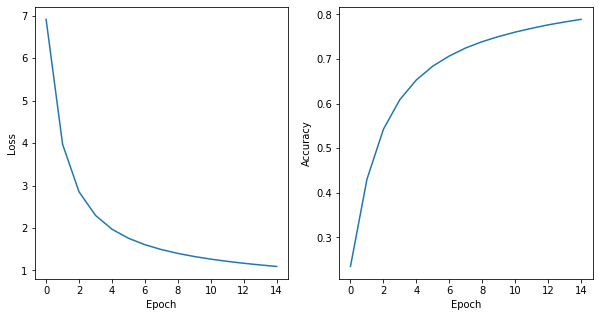

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss_list)

plt.subplot(1,2,2)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(accuracy_list)

plt.show()